# 05 - Outlier Management (z-score)

In [1]:
# import libraries
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
pd.set_option('display.float_format', '{:.1f}'.format)
df = pd.read_csv("Numeric data (last year work).csv")

In [3]:
# define features and target
target_column = 'Rating'
X = df.drop(columns=[target_column])
y = df[target_column]

In [4]:
# Train Linear Regression on the Full Dataset
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.3, random_state=42)
model_full = LinearRegression()
model_full.fit(X_train_full, y_train_full)
predictions_full = model_full.predict(X_test_full)

In [5]:
# Detect Outliers Using Z-Score
def detect_outliers_zscore(data, threshold=3):
    """
    Detect outliers using Z-Score.
    
    Args:
    - data: A Pandas DataFrame or Series.
    - threshold: The Z-score threshold for identifying outliers.
    
    Returns:
    - A boolean mask where True indicates an outlier.
    """
    z_scores = np.abs(zscore(data))
    return z_scores > threshold

# Apply Z-Score Outlier Detection
outliers_zscore = pd.DataFrame({col: detect_outliers_zscore(df[col]) for col in X.columns})
print("Outliers detected using Z-Score:")
print(outliers_zscore.sum())  # Count outliers per column

# Combine Z-Score outliers into a single boolean mask
combined_outliers = outliers_zscore.any(axis=1)

Outliers detected using Z-Score:
Votes                   0
Meta Score              0
Year                    0
Duration                0
Action                  0
Adventure               0
Animation              66
Biography              70
Comedy                  0
Crime                   0
Documentary             2
Drama                   0
Family                 79
Fantasy               102
History                33
Horror                  0
Music                  26
Musical                17
Mystery                 0
Romance                 0
Sci-Fi                110
Sport                  23
Thriller                0
War                    15
Western                 5
PG Rating_13+           1
PG Rating_16+           0
PG Rating_18+           0
PG Rating_Approved      0
PG Rating_G            18
PG Rating_GP            0
PG Rating_NC-17         4
PG Rating_PG            0
PG Rating_PG-13         0
PG Rating_Passed        0
PG Rating_R             0
PG Rating_TV-14         2
PG Ra

In [6]:
# Filter the dataset
X_cleaned = X[~combined_outliers]
y_cleaned = y[~combined_outliers]

print(f"Shape after Z-Score-based outlier removal: {X_cleaned.shape}")

Shape after Z-Score-based outlier removal: (633, 41)


In [7]:
# Train Linear Regression on the Cleaned Dataset
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned, y_cleaned, test_size=0.3, random_state=42
)
model_cleaned = LinearRegression()
model_cleaned.fit(X_train_cleaned, y_train_cleaned)
predictions_cleaned = model_cleaned.predict(X_test_cleaned)

In [ ]:
# Evaluate Linear Regression on the cleaned dataset
print("\nMetrics After Outlier Management:")
print("MAE:", round(mean_absolute_error(y_test_cleaned, predictions_cleaned), 2))
print("MSE:", round(mean_squared_error(y_test_cleaned, predictions_cleaned), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test_cleaned, predictions_cleaned)), 2))
print("R-squared:", round(r2_score(y_test_cleaned, predictions_cleaned), 2))

# Linear Regression Metrics (without any imporvement):
# MAE: 0.29
# MSE: 0.13
# RMSE: 0.36
# R-squared: 0.55

# the same issue with R-squared


Metrics After Outlier Management:
MAE: 0.29
MSE: 0.13
RMSE: 0.36
R-squared: 0.45


C:\Users\e1003118\AppData\Local\Temp\ipykernel_13120\3795089381.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_full - predictions_full, kde=True, label='Before Outlier Management')
C:\Users\e1003118\AppData\Local\Temp\ipykernel_13120\3795089381.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

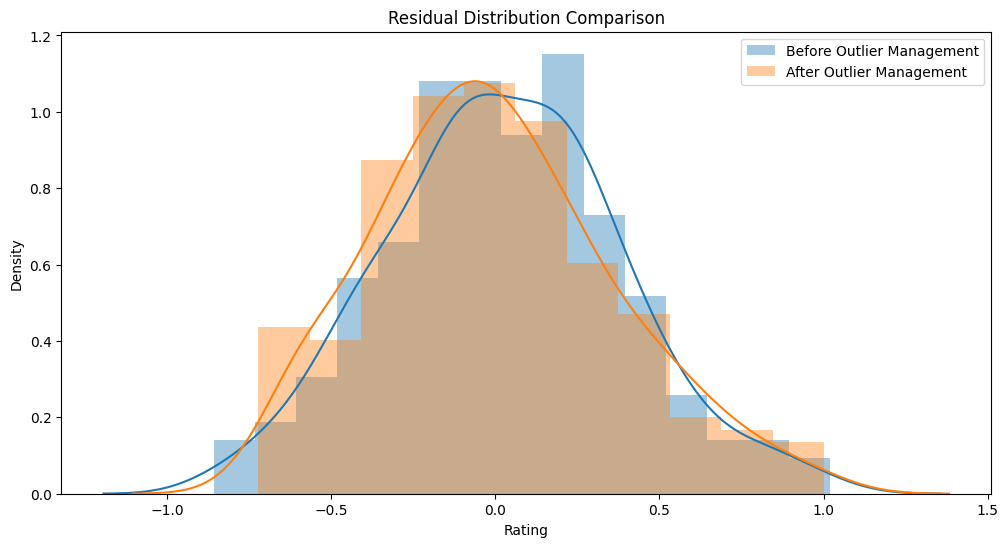

In [9]:
# Step 5: Visualize Residuals
plt.figure(figsize=(12, 6))
sns.distplot(y_test_full - predictions_full, kde=True, label='Before Outlier Management')
sns.distplot(y_test_cleaned - predictions_cleaned, kde=True, label='After Outlier Management')
plt.title('Residual Distribution Comparison')
plt.legend()
plt.show()

In [11]:
# after utilizing outlier,
# the residuals are slightly more concentrated, 
# ranging approximately from -0.8 to 1.2
# The peak is sharper and closer to 0, 
# indicating that most residuals 
# are smaller after removing outliers.

# overlap:
# The orange curve (after outlier management) overlaps 
# significantly with the blue curve (before outlier management) 
# near 0, indicating that the majority of residuals remain similar

# tails:
# The orange curve has narrower tails 
# compared to the blue curve, suggesting 
# that extreme residuals (caused by outliers) 
# have been mitigated.

# we can see improvements,
# The sharper peak and narrower distribution 
# indicate improved model performance 
# after removing outliers.